In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results, MonoexponentialModel, make_exp_data

# Общие параметры моделирования

In [2]:
NUM_EXAMPLES = 1000

# TIME_CONSTANT = 0.2
TIME_CONSTANT = 0.005
# TIME_CONSTANT = 0.0002
# TIME_CONSTANT = 10 ** float(np.random.uniform(low=-3.6, high=-0.7))

AMPL = 3.0
# AMPL = float(np.random.uniform(low=0.1, high=4))

F_PULSE = 20 * 10 ** (-6)

STDDEV = 0.2

LEARNING_RATE = 0.1
EPOCHS = 100

print(f'Time constant = {TIME_CONSTANT} s')
print(f'Amplitude = {AMPL}')

Time constant = 0.005 s
Amplitude = 3.0


# Генерация экспериментальных данных

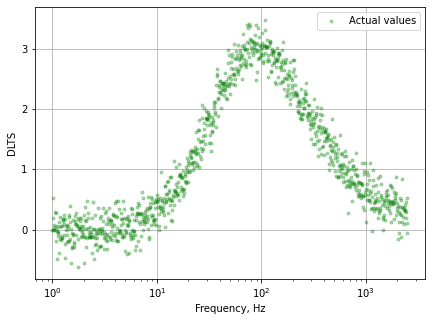

In [3]:
frequency, actual_dlts = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT,
                                       ampl=AMPL,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

plt.figure(figsize=(7,5))
plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
plt.xlabel('Frequency, Hz')
plt.ylabel('DLTS')
# plt.ylim(-1, 4)
plt.legend()
plt.grid()
plt.savefig('plots/monoexponential/experimental_data.svg')
plt.show()

# Модель до оптимизации параметров

Initial values:
Time constant power = -1.3190 log10(s)
Time constant = 0.0480 s
Amplitude = 2.1186 pF
MSE = 2.1322
RMSE = 1.460211


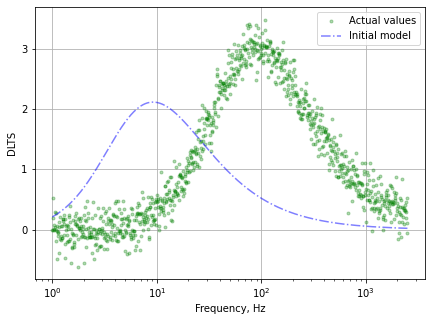

In [4]:
initial_model = MonoexponentialModel(filling_pulse=F_PULSE)

fig, ax = print_results(frequency = frequency, 
                        actual_dlts = actual_dlts,
                        initial_model = initial_model)

plt.show()

# Оптимизация модели простым градиентным спуском

Initial values:
Time constant power = -1.3190 log10(s)
Time constant = 0.0480 s
Amplitude = 2.1186 pF
MSE = 2.1322
RMSE = 1.460211

Final values:
Time constant power = -2.2953 log10(s)
Time constant = 0.0051 s
Amplitude = 3.0085 pF
MSE = 0.0425
RMSE = 0.206256


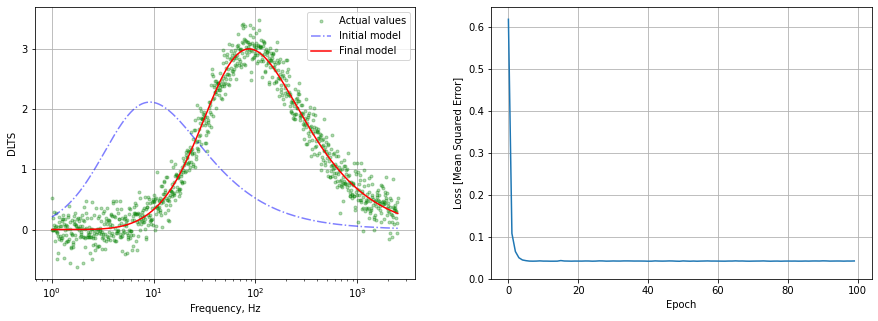

In [5]:
final_model = MonoexponentialModel(filling_pulse=F_PULSE,
                                   time_constant_power = initial_model.time_constant_power.numpy(),
                                   amplitude = initial_model.amplitude.numpy()
                                  )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.SGD(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

fig, ax = print_results(frequency = frequency,
                        actual_dlts = actual_dlts,
                        initial_model = initial_model,
                        final_model = final_model,
                        history = history
                       )

plt.savefig('plots/monoexponential/SGD.svg')
plt.show()

# Оптимизация параметров модели алгоритмом Adagrad

Initial values:
Time constant power = -1.3190 log10(s)
Time constant = 0.0480 s
Amplitude = 2.1186 pF
MSE = 2.1322
RMSE = 1.460211

Final values:
Time constant power = -2.3019 log10(s)
Time constant = 0.0050 s
Amplitude = 3.0074 pF
MSE = 0.0423
RMSE = 0.205726


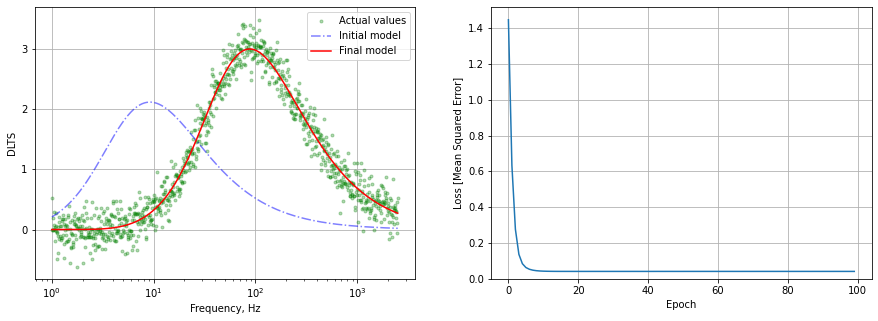

In [6]:
final_model = MonoexponentialModel(filling_pulse=F_PULSE,
                                   time_constant_power = initial_model.time_constant_power.numpy(),
                                   amplitude = initial_model.amplitude.numpy()
                                  )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=LEARNING_RATE)
                   )

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

fig, ax = print_results(frequency = frequency,
                        actual_dlts = actual_dlts,
                        initial_model = initial_model,
                        final_model = final_model,
                        history = history
                       )

plt.savefig('plots/monoexponential/Adagrad.svg')
plt.show()

# Оптимизация параметров модели алгоритмом Adamax

Initial values:
Time constant power = -1.3190 log10(s)
Time constant = 0.0480 s
Amplitude = 2.1186 pF
MSE = 2.1322
RMSE = 1.460211

Final values:
Time constant power = -2.3061 log10(s)
Time constant = 0.0049 s
Amplitude = 3.0075 pF
MSE = 0.0424
RMSE = 0.205873


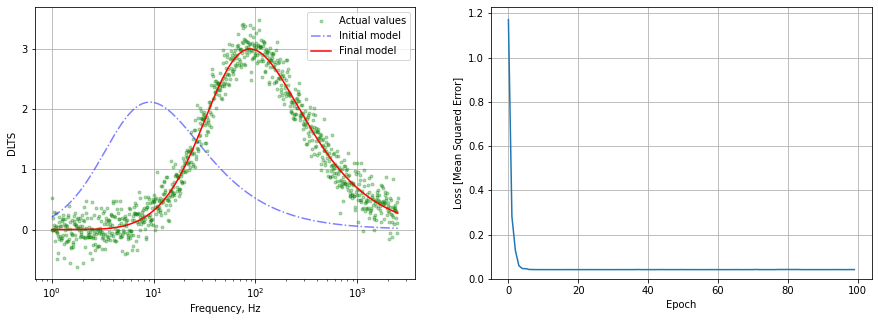

In [7]:
final_model = MonoexponentialModel(filling_pulse=F_PULSE,
                                   time_constant_power = initial_model.time_constant_power.numpy(),
                                   amplitude = initial_model.amplitude.numpy()
                                  )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

fig, ax = print_results(frequency = frequency,
                        actual_dlts = actual_dlts,
                        initial_model = initial_model,
                        final_model = final_model,
                        history = history
                       )

plt.savefig('plots/monoexponential/Adamax.svg')
plt.show()